## RFM ANALYSIS 

*Author - Olalekan Fagbuyi*

RFM is an analytic framework used to understand and analyze customer behaviour based on three factors;

* RECENCY -  Last time the customer purchased from the business

* FREQUENCY - How often does the customer patronize the business

* MONETARY - Total spend of the customer during a particular period

RFM analysis enables businesses cluster their customer base into different homogenous segments so that they can engage with each group with different targeted marketing strategies. RFM segmentation also provides answers to frequently asked business questions like;

Who are my best customers?

Which customers are on the verge of churning?

Who are lost customers that you don’t need to pay much attention to?

Who are your loyal customers?

Which customers you must retain?

Who has the potential to be converted into more profitable customers?

This project is focused on dividing the customer base of an Australian bike company into different segements using the RFM framework. Data was sourced from Kaggle https://www.kaggle.com/datasets/rahuljangam/bicycle-sales-australia and it shows transaction details, customer details and customer demographics.

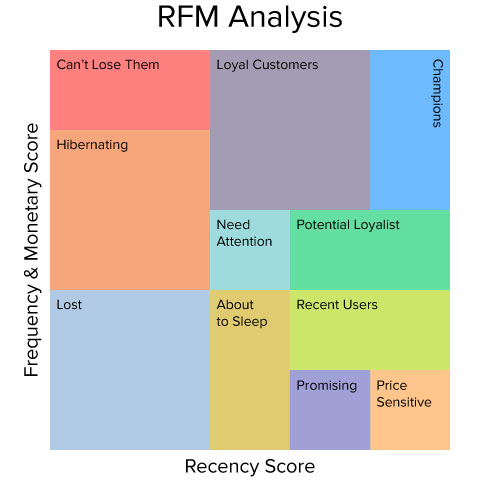

### Table of Contents

1. Importing Libraries and Loading Dataset
2. Exploratory Data Analysis
3. Data Cleaning
4. Calculating Recency, Frequency and Monetary
5. Customer Segmentation
6. Recommendations

### 1. Importing Libraries and Loading Dataset

In [1]:
#Data Analysis
import pandas as pd
import numpy as np
import math

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import plotly.express as px
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Datetime manipulation
import datetime as dt

#Accessing files
import glob

#Notebook Settings
pd.set_option('display.max_columns', None)
pd.get_option('max_colwidth')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading excel file with multiple sheets
full_df = pd.read_excel("C:\\Users\\ofagb\\OneDrive\\Documents\\Python\\RFM Data.xlsx",
                         sheet_name = ['Transactions','CustomerDemographic', 'CustomerAddress'])

In [3]:
# Get DataFrame from Dict
txns_df = full_df.get('Transactions')
demo_df = full_df.get('CustomerDemographic')
address_df = full_df.get('CustomerAddress') 

In [4]:
#viewing head of dfs
txns_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,42791,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,42876,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,43024,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,42978,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,43009,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [5]:
demo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [6]:
address_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,WA,Australia,10
1,2,6 Meadow Vale Court,2153,WA,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,WA,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
#merge all dfs on customer_id
from functools import reduce

#define list of DataFrames
dfs = [txns_df, demo_df, address_df]

#merge all DataFrames into one
all_df = reduce(lambda  left,right: pd.merge(left,right,on=['customer_id'],
                                            how='outer'), dfs)
print(all_df.shape)
all_df.head()

(20510, 29)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1.0,2.0,2950,42791.0,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,Kristos,Anthony,Male,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,11065.0,1.0,2950,43024.0,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2003-02-07,Kristos,Anthony,Male,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
2,18923.0,62.0,2950,42851.0,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,2010-11-05,Kristos,Anthony,Male,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
3,2.0,3.0,3120,42876.0,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,Lauree,O'Donnell,Female,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0
4,6862.0,4.0,3120,43013.0,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,2011-04-16,Lauree,O'Donnell,Female,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0


### 2. Exploratory Data Analysis

In this section, exploratory data analysis (EDA) will be carried out on the dataset to summarize its main characteristics, using statistical and data visualization methods. Also, obvious patterns, errors will be identified with the dataset terns within the data, as well as finding possible relationship among variables.

In [8]:
#checking for datatypes and null values
all_df.dtypes

transaction_id                                float64
product_id                                    float64
customer_id                                     int64
transaction_date                              float64
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                datetime64[ns]
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases           float64
DOB                                    datetime64[ns]
job_title                   

In [9]:
#Getting percentage of missing values per column
percentage_missing = all_df.isnull().sum()*100/len(all_df)
percentage_missing

transaction_id                          2.486592
product_id                              2.486592
customer_id                             0.000000
transaction_date                        2.486592
online_order                            4.241833
order_status                            2.486592
brand                                   3.447099
product_line                            3.447099
product_class                           3.447099
product_size                            3.447099
list_price                              2.486592
standard_cost                           3.447099
product_first_sold_date                 3.447099
first_name                              0.029254
last_name                               3.222818
gender                                  0.029254
past_3_years_bike_related_purchases     0.029254
DOB                                     2.257435
job_title                              12.106290
job_industry_category                  16.235982
wealth_segment      

<AxesSubplot: >

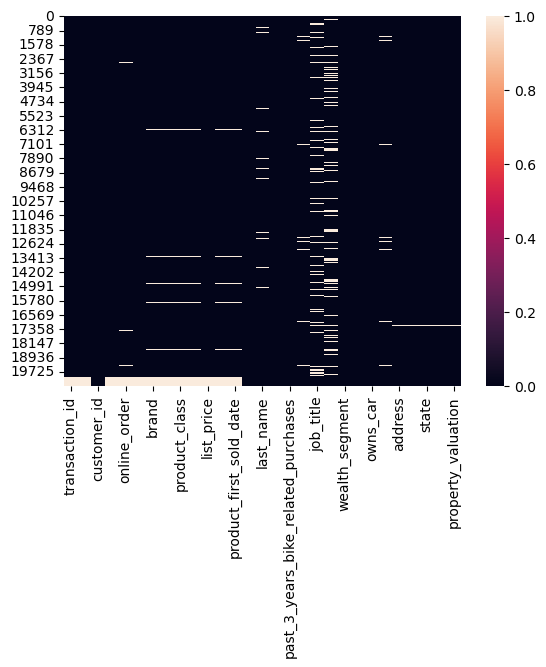

In [10]:
#visualizing missing values via an heatmap
sns.heatmap(all_df.isnull())

In [11]:
#are there duplicates
print(all_df.duplicated().any())

#how many duplicates?
duplicates = all_df.duplicated().sum()
print(duplicates)

False
0


In [12]:
#summarizing key statistical measures and distribtuon of the df
all_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,past_3_years_bike_related_purchases,tenure,postcode,property_valuation
count,20000.000000,20000.00000,20510.000000,20000.000000,19640.000000,20000.000000,19803.000000,20504.000000,20047.000000,20478.000000,20478.000000
mean,10000.500000,45.36465,1787.736226,42917.588950,0.500458,1107.829449,556.046951,48.789602,10.678256,2986.966696,7.516066
std,5773.647028,30.75359,1047.115605,105.363068,0.500013,582.825242,405.955660,28.621405,5.673263,849.902839,2.825164
min,1.000000,0.00000,1.000000,42736.000000,0.000000,12.010000,7.210000,0.000000,1.000000,2000.000000,1.000000
25%,5000.750000,18.00000,883.250000,42826.000000,0.000000,575.270000,215.140000,24.000000,6.000000,2200.000000,6.000000
50%,10000.500000,44.00000,1781.500000,42919.000000,1.000000,1163.890000,507.580000,48.000000,11.000000,2767.000000,8.000000
75%,15000.250000,72.00000,2677.000000,43010.000000,1.000000,1635.300000,795.100000,73.000000,15.000000,3752.000000,10.000000
max,20000.000000,100.00000,5034.000000,43099.000000,1.000000,2091.470000,1759.850000,99.000000,22.000000,4883.000000,12.000000


In [13]:
#value counts of all key categorical variables
cat_columns= all_df.select_dtypes(include=object)
cat_columns2 = cat_columns.drop(columns = ['address','first_name', 'last_name', 'job_title', 'job_industry_category'], axis = 1)

#converting value counts to a dataframe
cat_distr= cat_columns2.columns.tolist()
(pd.DataFrame(
    cat_columns2[cat_distr]
    .melt(var_name='Category', value_name='Value')
    .value_counts())
.rename(columns={0: 'Count'})
.sort_values(by=['Category', 'Count'])).reset_index()

,Category,Value,Count
0,brand,Norco Bicycles,2910
1,brand,Trek Bicycles,2990
2,brand,OHM Cycles,3043
3,brand,WeareA2B,3295
4,brand,Giant Bicycles,3312
5,brand,Solex,4253
6,country,Australia,20478
7,deceased_indicator,Y,9
8,deceased_indicator,N,20495
9,gender,M,6


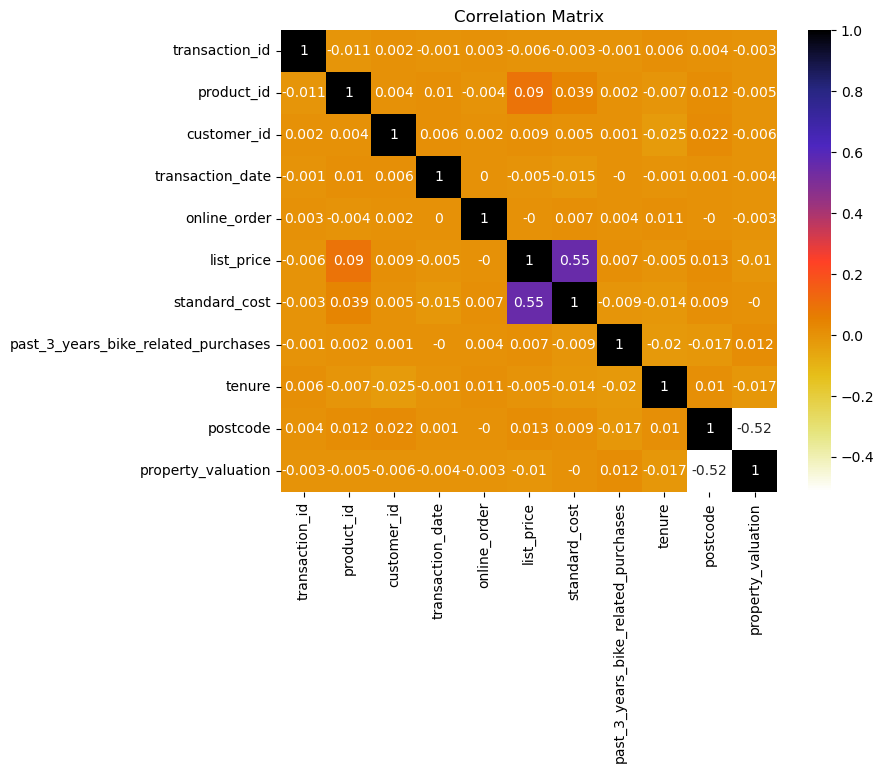

In [14]:
#checking for correlation among numerical variables
num_columns = all_df.select_dtypes(include=[np.number])
cor = num_columns.corr().round(decimals = 3)
cor

#visualizing correlation
plt.figure(figsize=(8,6)) #increase heatmap size
sns.heatmap(cor, annot = True, cmap=plt.cm.CMRmap_r)
plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix', dpi =200, bbox_inches = 'tight')

### 3. Data Cleaning

After performing EDA, the data cleaning process which involves identifying and correcting corrupt, incomplete, duplicated, incorrect, and irrelevant data is carried out. Incosistencies will also be spotted and resolved in order to improve the quality of the dataset.

In [15]:
#dropping null values
all_df2 = all_df.dropna(subset=['customer_id', 'transaction_date', 'list_price'])
print(all_df2.shape)

(20000, 29)


In [16]:
#dropping unnecessary columns
required_df = all_df2.drop(columns = ['transaction_id', 'product_id', 'brand', 'product_line','standard_cost', 'product_first_sold_date',
                                     'past_3_years_bike_related_purchases','job_title', 'job_industry_category', 'wealth_segment', 
                                     'owns_car', 'tenure', 'country','property_valuation', 'product_class', 'product_size', 'DOB'], axis = 1)
print(required_df.shape)
required_df.head()

(20000, 12)


,customer_id,transaction_date,online_order,order_status,list_price,first_name,last_name,gender,deceased_indicator,address,postcode,state
0,2950,42791.0,0.0,Approved,71.49,Kristos,Anthony,Male,N,984 Hoepker Court,3064.0,VIC
1,2950,43024.0,0.0,Approved,1403.50,Kristos,Anthony,Male,N,984 Hoepker Court,3064.0,VIC
2,2950,42851.0,0.0,Approved,478.16,Kristos,Anthony,Male,N,984 Hoepker Court,3064.0,VIC
3,3120,42876.0,1.0,Approved,2091.47,Lauree,O'Donnell,Female,N,4 Shopko Circle,2196.0,NSW
4,3120,43013.0,0.0,Approved,1129.13,Lauree,O'Donnell,Female,N,4 Shopko Circle,2196.0,NSW


In [17]:
#cleaning up columns

#converting columns to appropriate data types
required_df['transaction_date'] = pd.TimedeltaIndex(required_df['transaction_date'], unit='d') + dt.datetime(1900,1,1)
required_df['postcode'] = required_df['postcode'].fillna(0).astype(int)

#replacing wrong values in columns
required_df = required_df.replace({'online_order': {0: 'No',  1: 'Yes'}})
required_df = required_df.replace({'gender': {'M': 'Male',  'F': 'Female','Femal': 'Female',  'U': 'Others'}})
required_df = required_df.replace({'state': {'wA': 'WA'}})

#merging name column
required_df['full_name'] = required_df['first_name'].map(str) + ' ' + required_df['last_name'].map(str)
required_df = required_df.drop(columns = ['first_name', 'last_name' ], axis = 1)

required_df.head()

,customer_id,transaction_date,online_order,order_status,list_price,gender,deceased_indicator,address,postcode,state,full_name
0,2950,2017-02-27,No,Approved,71.49,Male,N,984 Hoepker Court,3064,VIC,Kristos Anthony
1,2950,2017-10-18,No,Approved,1403.50,Male,N,984 Hoepker Court,3064,VIC,Kristos Anthony
2,2950,2017-04-28,No,Approved,478.16,Male,N,984 Hoepker Court,3064,VIC,Kristos Anthony
3,3120,2017-05-23,Yes,Approved,2091.47,Female,N,4 Shopko Circle,2196,NSW,Lauree O'Donnell
4,3120,2017-10-07,No,Approved,1129.13,Female,N,4 Shopko Circle,2196,NSW,Lauree O'Donnell


In [18]:
#picking relevant columns for rfm analysis
rfm_data = required_df[(required_df['order_status'] == 'Approved') & (required_df['deceased_indicator'] == 'N')]

print(rfm_data.shape)
rfm_data.head()

(19810, 11)


,customer_id,transaction_date,online_order,order_status,list_price,gender,deceased_indicator,address,postcode,state,full_name
0,2950,2017-02-27,No,Approved,71.49,Male,N,984 Hoepker Court,3064,VIC,Kristos Anthony
1,2950,2017-10-18,No,Approved,1403.50,Male,N,984 Hoepker Court,3064,VIC,Kristos Anthony
2,2950,2017-04-28,No,Approved,478.16,Male,N,984 Hoepker Court,3064,VIC,Kristos Anthony
3,3120,2017-05-23,Yes,Approved,2091.47,Female,N,4 Shopko Circle,2196,NSW,Lauree O'Donnell
4,3120,2017-10-07,No,Approved,1129.13,Female,N,4 Shopko Circle,2196,NSW,Lauree O'Donnell


### 4. Recency, Frequency, Monetary (RFM)

In [19]:
#calculating recency
rfm_recency = rfm_data.groupby(by='full_name',as_index=False)[['customer_id','transaction_date']].max()
rfm_recency.columns = ['full_name', 'customer_id','last_purchase_date', ]

recent_date = rfm_recency['last_purchase_date'].max()

rfm_recency['recency'] = rfm_recency['last_purchase_date'].apply(lambda x: (recent_date - x).days)
rfm_recency.head()

,full_name,customer_id,last_purchase_date,recency
0,Aarika Magog,1368,2017-11-14,48
1,Aarika Van Vuuren,164,2017-06-17,198
2,Abagail Tordiffe,508,2017-07-30,155
3,Abba Masedon,57,2017-11-27,35
4,Abbey Murrow,2413,2017-11-04,58


   no_of_customers  days_from_purchase
0               11                  59
1                2                  57
2               14                  57
3               12                  52
4                5                  52


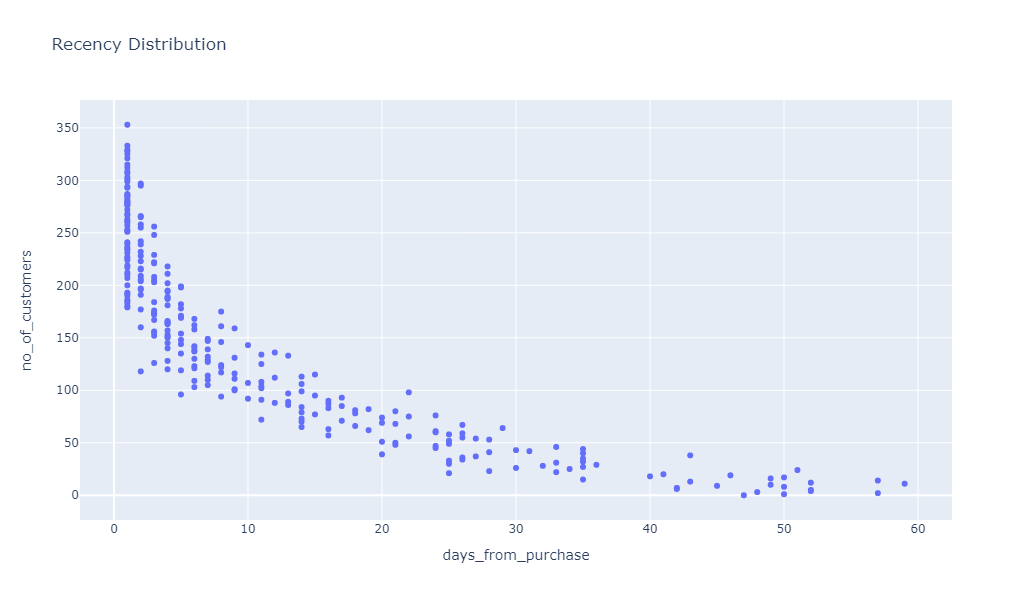

In [20]:
#visualizing recency
recency_count = rfm_recency['recency'].value_counts()

#converting series to df and resetting index
recency = pd.DataFrame(recency_count)
recency = recency.reset_index()
recency.columns = ['no_of_customers', 'days_from_purchase']
print(recency.head())

fig = px.scatter(recency, x="days_from_purchase", y="no_of_customers",
                 title = 'Recency Distribution',width=800, height=600)
fig.show()

In [21]:
#calculating frequency
rfm_frequency = rfm_data.groupby(by=['full_name'], as_index=False).agg(customer_id = ('customer_id', 'max'),
                                                                       frequency = ('transaction_date', 'count')) 
rfm_frequency.head()

,full_name,customer_id,frequency
0,Aarika Magog,1368,6
1,Aarika Van Vuuren,164,3
2,Abagail Tordiffe,508,6
3,Abba Masedon,57,6
4,Abbey Murrow,2413,7


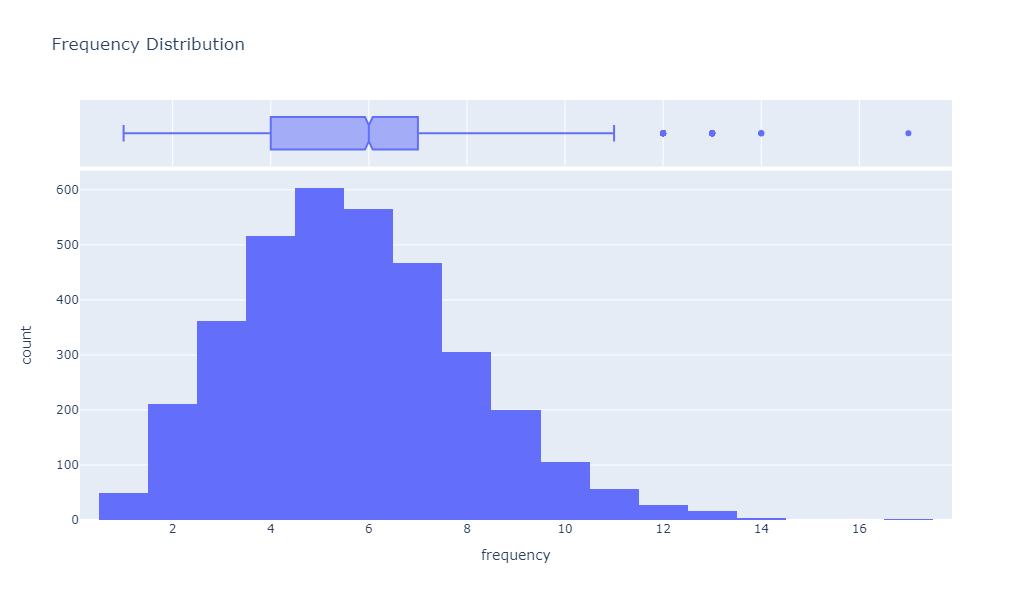

In [22]:
#visualizing frequency
fig = px.histogram(rfm_frequency, x="frequency", marginal="box", title = 'Frequency Distribution',
                  width=800, height=600)
fig.show()

In [23]:
#calculating monetary
rfm_monetary = rfm_data.groupby(by=['full_name'], as_index=False).agg(customer_id = ('customer_id', 'max'),
                                                                       monetary = ('list_price', 'sum')) 
rfm_monetary.head()

,full_name,customer_id,monetary
0,Aarika Magog,1368,6882.69
1,Aarika Van Vuuren,164,2583.85
2,Abagail Tordiffe,508,7648.20
3,Abba Masedon,57,8748.75
4,Abbey Murrow,2413,8666.87


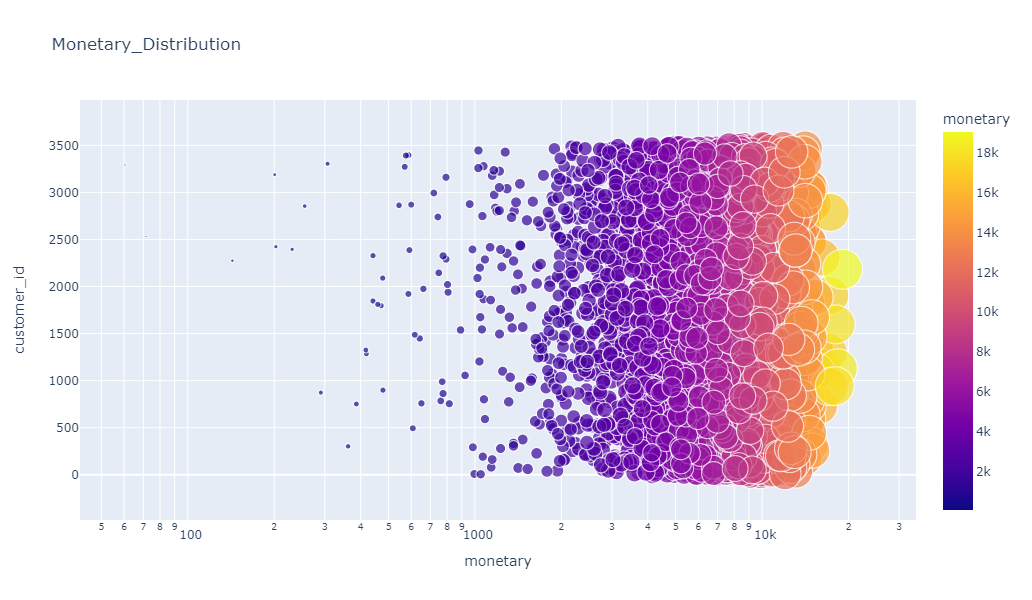

In [24]:
#vizualizing monetary distribution
fig = px.scatter(rfm_monetary, x="monetary", y="customer_id",size="monetary",color="monetary",hover_name="full_name", 
                 title = 'Monetary_Distribution',log_x=True, size_max=40, width=800, height=600)
fig.show()

In [25]:
#merging all 3 dfs
rfm1 = pd.merge(rfm_recency, rfm_frequency, how="outer", 
                  on=["full_name", "customer_id"]).drop(columns='last_purchase_date')

rfm_df= pd.merge(rfm1, rfm_monetary, how='outer',on=["full_name", "customer_id"])
rfm_df.head()

,full_name,customer_id,recency,frequency,monetary
0,Aarika Magog,1368,48,6,6882.69
1,Aarika Van Vuuren,164,198,3,2583.85
2,Abagail Tordiffe,508,155,6,7648.20
3,Abba Masedon,57,35,6,8748.75
4,Abbey Murrow,2413,58,7,8666.87


### 5. Customer Segmentation

At this point, the dataset will be divided into 3 quantiles where each customer will get a value from 1-3 for Recency, Frequency and Monetary parameters. The higher number signifying a higher score. i.e 3 implies most recent, more frequent and high spending customers with 1 signifies the opposite end of the scale.

The rfm dataframe will be divided into quartiles with each one containing 33.33% of the population.

In [26]:
# Dividing the recency, frequency and monetary into 3 groups with (0 to 33.33%, 33.33% to 66.66%, 66.65% to 100%) using pd.cut() function
rfm_df['r_score'] = pd.qcut(rfm_df['recency'], 3, ['3','2','1']) #recency has a reverse order because the lower the better
rfm_df['f_score'] = pd.qcut(rfm_df['frequency'], 3, ['1','2','3'])
rfm_df['m_score'] = pd.qcut(rfm_df['monetary'], 3, ['1','2','3'])

#concetating r-f-m scores into single rfm_score column
rfm_df["rfm_score"] = rfm_df["r_score"].astype(str) +rfm_df["f_score"].astype(str) + rfm_df["m_score"].astype(str)

#converting rfm_score column into int dtype
rfm_df['rfm_score'] = rfm_df['rfm_score'].astype(str).astype(int)

print(rfm_df.dtypes)
print(rfm_df.shape)
rfm_df.head(10)

full_name        object
customer_id       int64
recency           int64
frequency         int64
monetary        float64
r_score        category
f_score        category
m_score        category
rfm_score         int32
dtype: object
(3489, 9)


,full_name,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,Aarika Magog,1368,48,6,6882.69,2,2,2,222
1,Aarika Van Vuuren,164,198,3,2583.85,1,1,1,111
2,Abagail Tordiffe,508,155,6,7648.20,1,2,3,123
3,Abba Masedon,57,35,6,8748.75,2,2,3,223
4,Abbey Murrow,2413,58,7,8666.87,2,2,3,223
5,Abbey Nellen,3409,73,7,7353.55,1,2,3,123
6,Abbott Knaggs,3189,56,2,200.70,2,1,1,211
7,Abe Ealam,3380,63,5,6088.51,2,1,2,212
8,Abe Pilley,1078,18,6,5117.10,3,2,2,322
9,Abe Townby,1942,16,8,6241.37,3,3,2,332


In [27]:
#creating columns for customer segments based on rfm scores
segment_dict = {333: 'Champions', 332: 'Loyalists', 331: 'Loyalists', 323: 'Loyalists', 322: 'Loyalists', 233: 'Loyalists',
               232: 'Loyalists', 223: 'Loyalists', 321: 'Potential Loyalists', 231 :'Potential Loyalists', 222:'Potential Loyalists',
               321:'Potential Loyalists', 231:'Potential Loyalists', 222:'Potential Loyalists', 313: 'New Customers', 312: 'New Customers', 
                213: 'New Customers', 311:'Promising', 221 :'Promising', 211:'Promising', 122: 'Needs Attention', 123 : 'Needs Attention',
                212: 'Needs Attention',112 : 'About to Sleep',121 : 'About to Sleep', 132 : 'At Risk', 133 : 'Cannot Lose Them', 
                112: 'Hibernating',113 : 'Hibernating', 111 : 'Lost Customers'}

rfm_df['customer_segment'] = rfm_df['rfm_score'].map(segment_dict)
rfm_df

,full_name,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,customer_segment
0,Aarika Magog,1368,48,6,6882.69,2,2,2,222,Potential Loyalists
1,Aarika Van Vuuren,164,198,3,2583.85,1,1,1,111,Lost Customers
2,Abagail Tordiffe,508,155,6,7648.20,1,2,3,123,Needs Attention
3,Abba Masedon,57,35,6,8748.75,2,2,3,223,Loyalists
4,Abbey Murrow,2413,58,7,8666.87,2,2,3,223,Loyalists
...,...,...,...,...,...,...,...,...,...,...
3484,Zollie Exell,2677,27,5,5446.05,2,1,2,212,Needs Attention
3485,Zonnya Fayter,2188,70,6,6671.54,1,2,2,122,Needs Attention
3486,Zonnya Tolland,1754,142,5,6904.57,1,1,2,112,Hibernating
3487,Zorina Bosomworth,702,62,3,3825.66,2,1,1,211,Promising


In [28]:
#creating a df for the Platform value counts
segment_count = rfm_df['customer_segment'].value_counts()

segment_df = pd.DataFrame({'customer_segment': segment_count.index, 'no_of_customers': segment_count.values})

#creating new column for Percent of Tweets for each Device_App
segment_df['segment_percent'] = round((segment_df['no_of_customers'] / segment_df['no_of_customers'].sum()) * 100,2)
segment_df.head(11)

,customer_segment,no_of_customers,segment_percent
0,Loyalists,833,23.88
1,Promising,594,17.02
2,Lost Customers,520,14.90
3,Needs Attention,439,12.58
4,Champions,306,8.77
5,Hibernating,261,7.48
6,Potential Loyalists,207,5.93
7,New Customers,206,5.90
8,Cannot Lose Them,92,2.64
9,About to Sleep,19,0.54


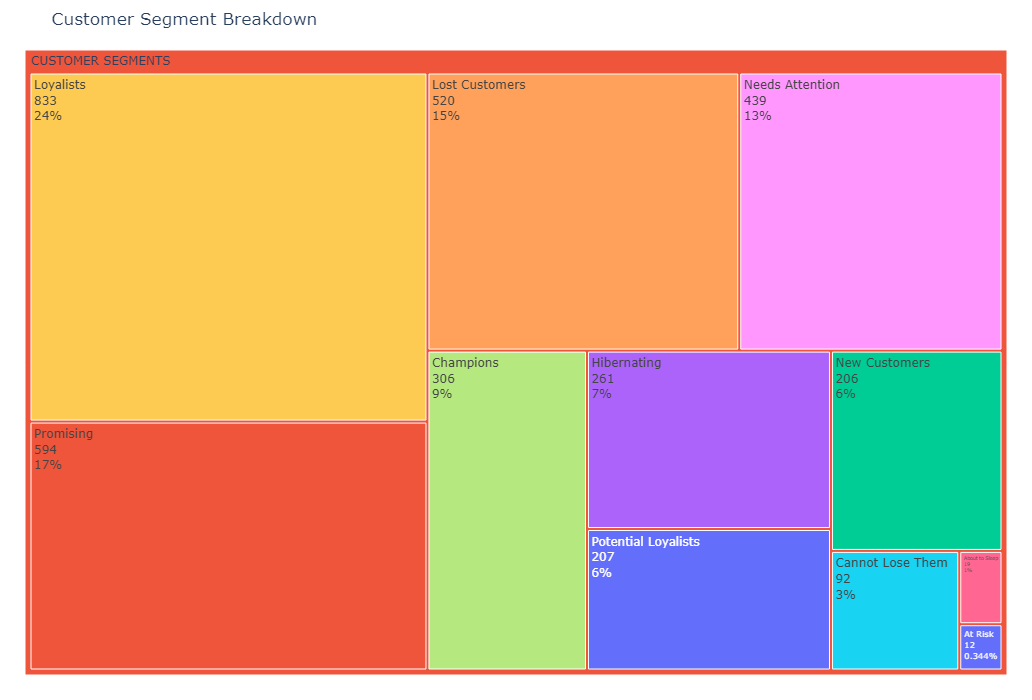

In [29]:
fig = px.treemap(segment_df, path=[px.Constant("CUSTOMER SEGMENTS"), 'customer_segment'], values='no_of_customers',
                  color='customer_segment',color_continuous_scale= 'earth',
                  color_continuous_midpoint=np.average(segment_df['no_of_customers']))

fig.update_layout(title="Customer Segment Breakdown", margin = dict(t=50, l=25, r=25, b=25),width=800, height=700)
fig.data[0].textinfo = "label+value+percent parent"
fig.show()

### 6. Recommendations

| RFM Score | Customer Segement | Description |Recommendations |
| --- | --- | --- |--- |
| 333 | Champions | Bought recently, buys often and spends the most | Prioritize and reward them. Convert to early adapters and product evangelist who spread word of the brand|
| 332, 331, 323, 322, 233, 232, 223 | Loyalists | They have bough recently and they buy frequently | Offer loyalty programs for them to feel valued and upsell|
| 321, 231, 222 | Potential Loyalists| Recent customers that have bought a lot and more than once |Recommend more products to upscale to Loyalists|
| 313, 312, 213| New Customers | Recent customers that spent well but haven't bought frequently | Increased brand education to build awareness |
| 311, 221, 211 | Promising | Recent customers that haven't spent much |Create brand awareness by offering free trials or product samples |
| 212, 123, 122 | Needs Atention | Buys often and spends money but hasn't bought recently | Offer personalized communication and new product recommendions based on purchase history to reactivate this segment |
| 112, 121 | About to Sleep| Haven't bought in a while with below average frequency and monetary values | Reconnect with them for one last push offering discounted and popular deals |
| 132 | At Risk | They buy much and do so frequently, but they haven’t shopped recently.  | Bring back buy offering personalized communications and targeted products |
| 133 | Cannot Lose Them | They spend a lot but haven't bought recently | Run surveys to know what went wrong and try to win back after fixing issues |
| 112, 113 | Hibernating| Haven't bought in a long time and doesn't buy frequently |Decide if you want them then go after with relevant promos|
| 111 | Lost Customers | They didn’t make any purchase for a long time and they never spent a lot |Ignore, they offer little or no value to business |

### Conclusion

In conclusion, the RFM framewok helps companies in getting an all encompassing view of their customer base. It also helps in crafting appropriate strategies that helps maximize the lifetime value of your customers.